<a href="https://colab.research.google.com/github/Rezvan1344/ACIT-4070/blob/main/living_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Living_conditions_survey_only_2009_7_Cols_full.csv to Living_conditions_survey_only_2009_7_Cols_full.csv


In [ ]:
import pandas as pd
import io
living_dataset = pd.read_csv(io.BytesIO(uploaded['Living_conditions_survey_only_2009_7_Cols_full.csv']))

In [ ]:
X = living_dataset.drop(columns='Sp63b_09', axis= 1)

Y = living_dataset['Sp63b_09']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 3)

In [ ]:
print(living_dataset.std())

Antphush_09    1.866453
Sp63b_09       0.207985
Sp64a_09       0.647168
Sp65a_09       0.598980
Sp71a_09       0.363579
Sp72a_09       0.356700
Sp72a2_09      0.515214
dtype: float64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
model=LogisticRegression(max_iter=3000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=3000)

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
print (cv_score_lr)
mean_accuracy_lr = sum (cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

[0.9467509  0.95329422 0.94065884 0.95532491 0.95554051]
95.03


In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=10)
print (cv_score_lr)
mean_accuracy_lr = sum (cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

[0.94855596 0.94720217 0.95351986 0.95397112 0.94494585 0.94268953
 0.95622744 0.95487365 0.95532491 0.95575621]
95.13


In [1]:
import matplotlib.pyplot as plt

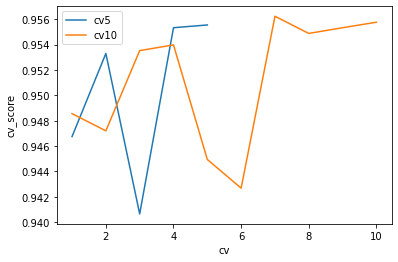

In [2]:
# cv = 5
x1 = [1,2,3,4,5]
y1 = [0.9467509, 0.95329422,0.94065884,0.95532491,0.95554051  ]
plt.plot (x1, y1, label ="cv5")
# cv = 10
x2 = [1,2,3,4,5,6,7,8,9,10]
y2 = [0.94855596, 0.94720217, 0.95351986, 0.95397112, 0.94494585, 0.94268953,
 0.95622744, 0.95487365, 0.95532491, 0.95575621 ]
plt.plot (x2, y2, label ="cv10")

plt.xlabel('cv')
plt.ylabel('cv_score')
plt.legend()
plt.show()